In [2]:
import seaborn as sns

In [3]:
titanic = sns.load_dataset("titanic")
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [4]:
from patsy import dmatrix

In [5]:
dmatrix("survived + pclass + age + 0", data = titanic)

DesignMatrix with shape (714, 3)
  survived  pclass  age
         0       3   22
         1       1   38
         1       3   26
         1       1   35
         0       3   35
         0       1   54
         0       3    2
         1       3   27
         1       2   14
         1       3    4
         1       1   58
         0       3   20
         0       3   39
         0       3   14
         1       2   55
         0       3    2
         0       3   31
         0       2   35
         1       2   34
         1       3   15
         1       1   28
         0       3    8
         1       3   38
         0       1   19
         0       1   40
         0       2   66
         0       1   28
         0       1   42
         0       3   21
         0       3   18
  [684 rows omitted]
  Terms:
    'survived' (column 0)
    'pclass' (column 1)
    'age' (column 2)
  (to view full data, use np.asarray(this_obj))

In [6]:
from sklearn.datasets import make_regression

X, y, w = make_regression(
    n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0
)

In [7]:
X

array([[-0.85409574],
       [ 1.49407907],
       [-0.34791215],
       [ 0.44386323],
       [-0.18718385],
       [ 1.86755799],
       [ 0.4105985 ],
       [-1.70627019],
       [-1.42001794],
       [ 0.8644362 ],
       [ 0.97873798],
       [-0.20515826],
       [ 0.15494743],
       [-0.50965218],
       [ 1.53277921],
       [-0.74216502],
       [-1.45436567],
       [-0.10321885],
       [-2.55298982],
       [ 1.76405235],
       [-1.25279536],
       [-0.97727788],
       [ 0.04575852],
       [-0.4380743 ],
       [ 0.76103773],
       [ 0.14404357],
       [-0.21274028],
       [ 1.20237985],
       [-0.38732682],
       [ 2.2408932 ],
       [ 0.77749036],
       [ 0.15634897],
       [-1.61389785],
       [ 1.9507754 ],
       [ 0.40015721],
       [ 1.46935877],
       [ 1.45427351],
       [-0.30230275],
       [ 0.3130677 ],
       [ 0.33367433],
       [ 2.26975462],
       [-0.15135721],
       [ 0.12167502],
       [ 0.37816252],
       [ 0.6536186 ],
       [ 0

In [8]:
y

array([ 69.16576208, 129.94932345,  80.01389923, 100.30585701,
       107.20314663, 140.88561123, 112.99506826,  82.25108224,
        71.56780523, 111.67769684, 112.48530888, 114.65029223,
       111.71570029, 101.63406761, 127.78240131,  93.08609825,
        80.69164687, 113.11903254,  61.0218126 , 131.15670173,
        91.08078405,  79.88503003,  90.81838842,  95.10877879,
       108.56190647,  98.64651153,  96.63568503, 125.15577947,
        98.56417169, 131.95814648, 121.75870162, 106.25707916,
        80.40782312, 128.46531432,  98.60107781, 110.84947303,
       116.3307515 , 103.39347869, 106.6868286 , 103.97656433,
       127.6988851 ,  97.31416893,  94.52678796,  96.96377225,
       101.80069439, 119.35745   , 118.85230744, 104.32382223,
        92.40639334,  83.7664334 ])

In [9]:
w

array(15.89695836)

#### 연습문제  4.1.2
- make_regression과 같은 기능을 하는 함수 make_regression2를 만들어라. 단 make_regression2는 coef=True, n_features=1 라고 가정한다. 즉 항상 가중치 계수를 반환하고 1차원 독립변수만 생성할 수 있다. 따라서 make_regression2는 다음과 같은 인수만 가진다.

````
n_samples
bias
noise
random_state
따라서 함수 사용법은 다음과 같아야 한다.

```

X, y, w = make_regression2(n_samples, bias, noise, random_state)

In [15]:
import matplotlib.pyplot as plt

In [12]:
def make_regression2(n_samples, bias, noise, random_state=0):
    np.random.seed(random_state)
    X = np.random.normal(size=n_samples)
    w = 100 * np.random.normal(size=1)[0]
    y0 = X * w + bias
    e = np.random.normal(scale=noise, size=n_samples)
    y = y0 + e
    return X, y, w
    

In [13]:
X, y, w = make_regression2(50, 100, 10)

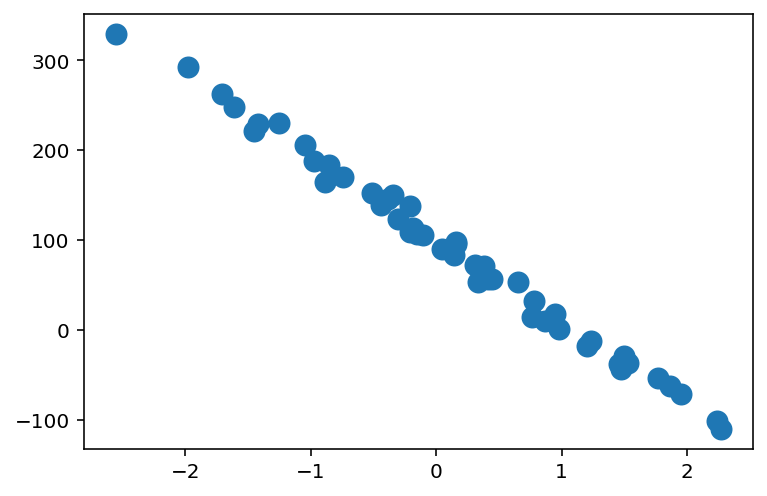

In [16]:
plt.scatter(X,y,s=100)
plt.show()

#### 4.2 선형회귀분석의 기초

In [18]:
import statsmodels.api as sm

In [19]:
from sklearn.datasets import make_regression

bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [20]:
df = pd.DataFrame({"x": X0[:, 0], "y": y[:, 0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


#### statsmodels 패키지를 사용한 선형 회귀분석

In [21]:
model = sm.OLS.from_formula("y ~ x", data=df)
result = model.fit()


In [ ]:
# 이렇게 해도 됨.
# dfy = df[["y"]]  #y를 따로 만들어줌
# dfX = sm.add_constant(df[["x"]])  #x를 따로 만들어주는데 상수항은 수동으로 추가(sm.add_constant)
# model = sm.OLS(dfy, dfX)
# result = model.fit()

In [22]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Tue, 12 May 2020   Prob (F-statistic):          8.17e-182
Time:                        23:17:54   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

In [ ]:
# const y 절편을 의미 여기선 intercept

In [23]:
result.predict({"x": [-2, -1, 0, 1, 2] })

0    -74.131915
1     12.829797
2     99.791509
3    186.753221
4    273.714933
dtype: float64

In [24]:
result.resid.sum()  #잔차를 모두 더하면 0

3.7196912217041245e-12

In [25]:
result.predict({"x": X0.mean()})  #x로 x의 평균값을 넣으면 결과로 y의 평균이 된다. 아래보면 y의 평균과 같다

0    109.069351
dtype: float64

In [26]:
y.mean()

109.06935068170773